In [4]:
from qiskit import BasicAer
from qiskit.tools.visualization import plot_histogram
import qiskit.optimization
from qiskit.aqua.algorithms import VQE, ExactEigensolver
from qiskit.aqua.components.optimizers import SPSA
from qiskit.aqua.components.variational_forms import RY
from qiskit.aqua import QuantumInstance

In [11]:
import networkx as nx
import numpy as np
import matplotlib as plt

In [10]:
n = 4
G = nx.Graph()
G.add_nodes_from(np.arange(0,n,1))
elist = [(0,1,1.0),(0,2,1.0),(0,3,1.0),(1,2,1.0),(2,3,1.0)]
#(i,j,weight), every (i,j) is an edge
G.add_weighted_edges_from(elist)

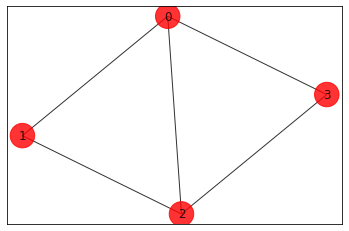

In [18]:
colors = ['r' for node in G.nodes()]
pos = nx.spring_layout(G)
#default_axes = plt.axes(frameon=True)
nx.draw_networkx(G, node_color = colors, node_size = 600, alpha = .8, pos=pos)

In [21]:
from docplex.mp.model import Model

In [27]:
mdl = Model(name = 'max_cut')
x = {i:mdl.binary_var(name = 'x_{0}'.format(i)) for i in range(n)}

w = np.ones((n,n))
for j in range(n):
    max_cut_func = mdl.sum(w[i,j]*x[i]*(1-x[j]) for i in range(n))
    mdl.maximize(max_cut_func)

In [29]:
seed = 10598

spsa = SPSA(max_trials=300)
ry = RY(qubitOp.num_qubits, depth=5,entanglement='linear')
vqe = VQE(qubitOp, ry, spsa)

NameError: name 'qubitOp' is not defined